# Mcdonald Assignment- TEJASPADEKAR_07-Feb-2021

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette("deep")
from warnings import filterwarnings
filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats
import scipy.stats as ss
from scipy.stats import ttest_1samp, ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_rel
import statsmodels.stats.api as sm

In [2]:
md = pd.read_csv ('Mcdonald.csv')
md.head()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [3]:
md.shape

(260, 24)

In [4]:
print("The number of rows are: ",md.shape[0],"\nThe number of columns are: ",md.shape[1])

The number of rows are:  260 
The number of columns are:  24


In [5]:
md.size

6240

In [6]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [7]:
md.isnull()

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
256,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
257,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
258,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
md.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

In [9]:
md.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [10]:
md.describe(include = 'all')

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260,260,260,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
unique,9,260,107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,Coffee & Tea,Mocha with Nonfat Milk (Large),16 fl oz cup,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,95,1,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,NaN,NaN,NaN,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,NaN,NaN,NaN,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,NaN,NaN,NaN,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000


In [11]:
md.describe().T

,count,mean,std,min,25%,50%,75%,max
Calories,260.0,368.269231,240.269886,0.0,210.000,340.0,500.00,1880.0
Calories from Fat,260.0,127.096154,127.875914,0.0,20.000,100.0,200.00,1060.0
Total Fat,260.0,14.165385,14.205998,0.0,2.375,11.0,22.25,118.0
Total Fat (% Daily Value),260.0,21.815385,21.885199,0.0,3.750,17.0,35.00,182.0
Saturated Fat,260.0,6.007692,5.321873,0.0,1.000,5.0,10.00,20.0
Saturated Fat (% Daily Value),260.0,29.965385,26.639209,0.0,4.750,24.0,48.00,102.0
Trans Fat,260.0,0.203846,0.429133,0.0,0.000,0.0,0.00,2.5
Cholesterol,260.0,54.942308,87.269257,0.0,5.000,35.0,65.00,575.0
Cholesterol (% Daily Value),260.0,18.392308,29.091653,0.0,2.000,11.0,21.25,192.0
Sodium,260.0,495.750000,577.026323,0.0,107.500,190.0,865.00,3600.0


# Plot graphically which food categories have the highest and lowest varieties.

In [12]:
md["Category"].value_counts()

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

In [13]:
md["Category"].value_counts().head(1)

Coffee & Tea    95
Name: Category, dtype: int64

In [14]:
md["Category"].value_counts().tail(1)

Salads    6
Name: Category, dtype: int64

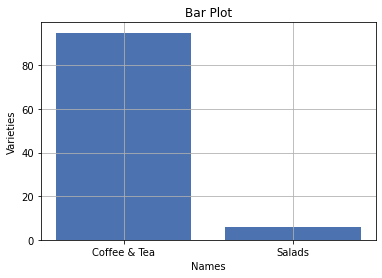

In [15]:
food_categories = {"Coffee & Tea":95,"Salads":6}
names = list(food_categories.keys())
varieties = list(food_categories.values())
plt.bar(names,varieties)
plt.title("Bar Plot")
plt.xlabel("Names")
plt.ylabel("Varieties")
plt.grid(True)
plt.show()

Coffee & Tea has the highest food varieties with 95 items and Salads has the lowest with 6 items just 1 item lesser than Desserts which is the second lowest with 7 varieties

# Which all variables have an outlier?

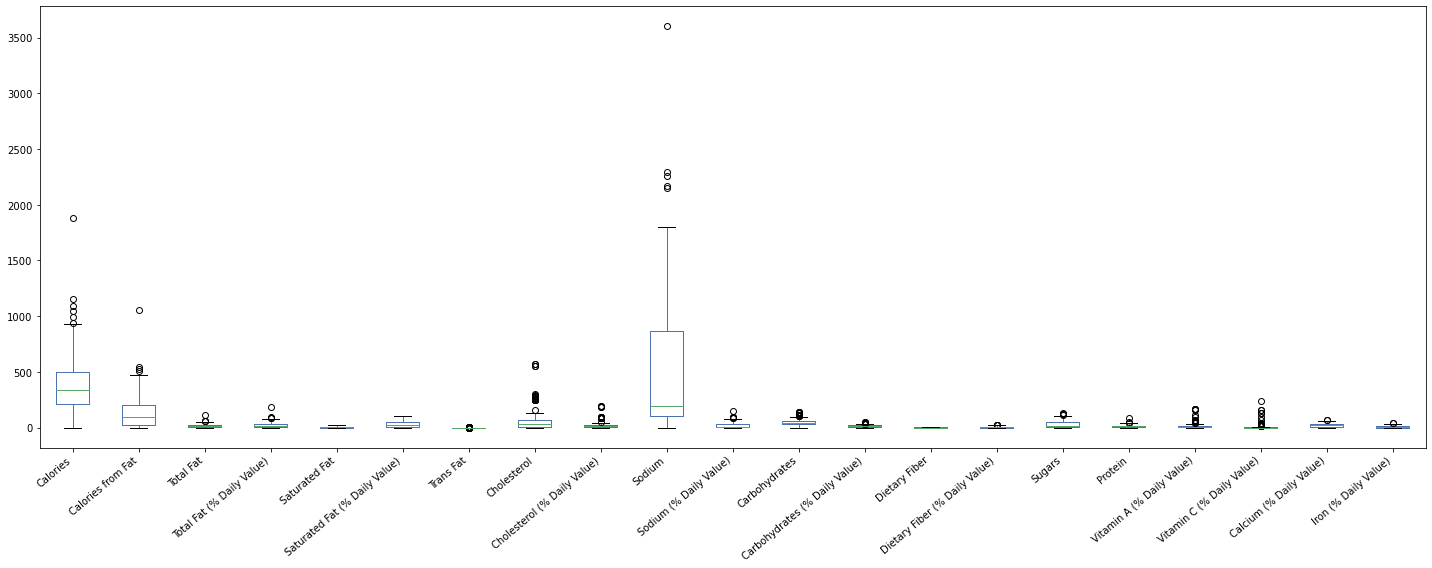

In [17]:
df = md.plot.box(figsize=(20,8))
df.set_xticklabels(df.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

As can be seen from the above image, all variables have outliers except for Saturated Fat, Saturated Fat (% Daily Value) & Dietary Fiber.

# Which variables have the highest correlation? Plot them and find out the value?

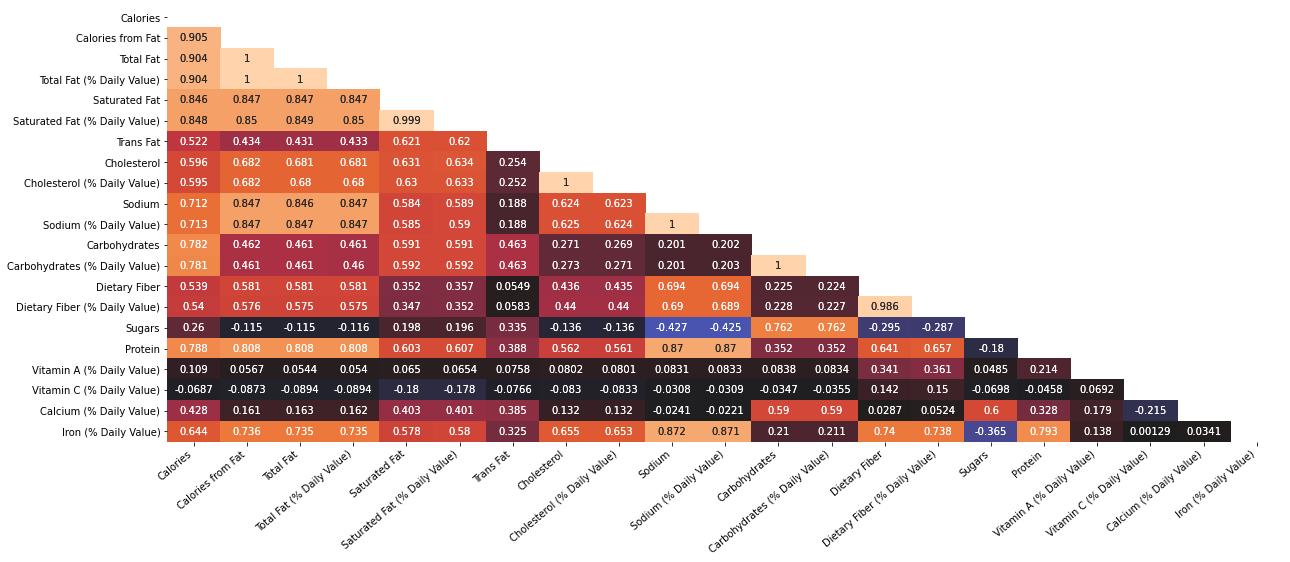

In [18]:
corr = md.corr()
plt.figure(figsize=(20,8))
matrix = np.triu(md.corr())
sns.heatmap(md.corr(), annot=True, mask=matrix, fmt='.3g',cbar=False,vmin=-1,vmax=1,center= 0)
df1 = sns.heatmap(md.corr(), annot=True, mask=matrix, fmt='.3g',cbar=False,vmin=-1,vmax=1,center= 0)
df1.set_xticklabels(df1.get_xticklabels(),rotation=40,ha='right')
plt.show()

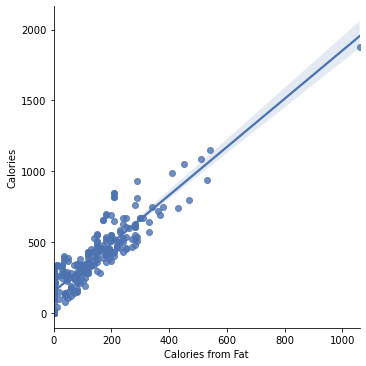

In [20]:
sns.lmplot(y="Calories",x="Calories from Fat", data=md);

The correlation between Calories and Calories from Fat is positive. This means that intake of Calories tends to increase as Calories from Fat increases.The value of correlation between these two as seen in the above graph is 0.905 which is the highest. 

Other variables which are highly correlated positively are Sodium & Iron % Daily with 0.872,Sodium & Protein with 0.87. Highest negatively correlated variables are Sodium and Sugar with the value of -0.427.

Thus it can also be concluded that Sodium forms one of the major variables od correlation with other variables of the dataframe. 

# Which category contributes to the maximum % of Cholesterol in a diet (% daily value)?

In [21]:
md.groupby('Category') ['Cholesterol (% Daily Value)'].sum()

Category
Beef & Pork            434
Beverages                5
Breakfast             2140
Chicken & Fish         681
Coffee & Tea           891
Desserts                34
Salads                 104
Smoothies & Shakes     412
Snacks & Sides          81
Name: Cholesterol (% Daily Value), dtype: int64

In [22]:
md["Cholesterol (% Daily Value)"].sum()

4782

In [23]:
print('Category contributing to the maximum % of Cholesterol in a diet (% daily value) is:', md.groupby('Category') ['Cholesterol (% Daily Value)'].sum()/md["Cholesterol (% Daily Value)"].sum())

Category contributing to the maximum % of Cholesterol in a diet (% daily value) is: Category
Beef & Pork           0.090757
Beverages             0.001046
Breakfast             0.447512
Chicken & Fish        0.142409
Coffee & Tea          0.186324
Desserts              0.007110
Salads                0.021748
Smoothies & Shakes    0.086156
Snacks & Sides        0.016939
Name: Cholesterol (% Daily Value), dtype: float64


In [24]:
round(md.groupby('Category')['Cholesterol (% Daily Value)'].sum()/md["Cholesterol (% Daily Value)"].sum(),2)*100

Category
Beef & Pork            9.0
Beverages              0.0
Breakfast             45.0
Chicken & Fish        14.0
Coffee & Tea          19.0
Desserts               1.0
Salads                 2.0
Smoothies & Shakes     9.0
Snacks & Sides         2.0
Name: Cholesterol (% Daily Value), dtype: float64

Breakfast contributes to the maximum 45% of Cholesterol in a diet (% daily value). Beverages contributes zero % with other lesser contributors being Desserts (1%) & Salads (2%). After Breakfast, the other categories which contribute more than 10% of Cholesterol in a diet (% daily value) are Coffee & Tea (19%) & Chicken & Fish (14%)  

# Which item contributes maximum to the Sodium intake?

In [25]:
md[md['Sodium']== md['Sodium'].max()][["Category","Item","Sodium"]]

,Category,Item,Sodium
82,Chicken & Fish,Chicken McNuggets (40 piece),3600


Chicken McNuggets(40 piece) has the highest intake of Sodium

# Which 4 food items contain the most amount of Saturated Fat?

In [26]:
md.sort_values(by='Saturated Fat',ascending = False).head(4)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
231,Coffee & Tea,Frappé Chocolate Chip (Large),22 fl oz cup,760,280,31.0,48,20.0,101,1.5,...,111,37,1,5,99,12,20,0,35,6
82,Chicken & Fish,Chicken McNuggets (40 piece),22.8 oz (646 g),1880,1060,118.0,182,20.0,101,1.0,...,118,39,6,24,1,87,0,15,8,25
32,Breakfast,Big Breakfast with Hotcakes (Large Biscuit),15.3 oz (434 g),1150,540,60.0,93,20.0,100,0.0,...,116,39,7,28,17,36,15,2,30,40
253,Smoothies & Shakes,McFlurry with M&M’s Candies (Medium),16.2 oz (460 g),930,290,33.0,50,20.0,102,1.0,...,139,46,2,7,128,20,25,0,70,10


The 4 food items containing the most amount of Saturated Fat are as below: 
1 Frappé Chocolate Chip (Large) 
2 Chicken McNuggets (40 piece)
3 Big Breakfast with Hotcakes (Large Biscuit)
4 McFlurry with M&M’s Candies (Medium)

Each of the above 4 items contribute exactly 20 ounces each of Saturated Fat